In [1]:
# 8.4.4_replacement_analysis_infinite_horizon_def_TC_non_decreasing.ipynb
""" 8.4.4 Optimal Replacement under Infinite Planning Horizon when
    Defender TC values are monotonically non-decreasing """
import numpy_financial as npf
import matplotlib.pyplot as plt
from EngFinancialPy import Asset, pprint_list

In [2]:
# Defender forklift truck 
MV0 = 5000
MV = [4000, 3000, 2000, 1000]  
E  = [5500, 6600, 7800, 8800 ]
marr = 0.1

In [3]:
def_forklift = Asset(MV0, MV, E, marr, age=2, name="Defender forklift truck")

In [4]:
# Get defender's TC values
TC_def = def_forklift.TC()
pprint_list("TC", TC_def)

TC = 7,000.00   8,000.00   9,100.00   10,000.00   


In [5]:
 def_forklift = Asset(MV0, MV, E, marr, age=2, name="Defender forklift truck")

In [6]:
# Best challenger EUAC under repeatability assumption.
MV0_new = 20000
MV_new = [15000, 11250, 8500, 6500,  4750 ]  
E_new  = [ 2000,  3000, 4620, 8000, 12000 ]

In [7]:
new_forklift = Asset(MV0_new, MV_new, E_new, marr, age=0, 
                     name="New forklift truck")

In [8]:
# Best challenger EUAC under repeatability assumption
challenger_econ_life, challenger_euac = new_forklift.econ_life_euac()
print(challenger_euac)

8598.187311178239


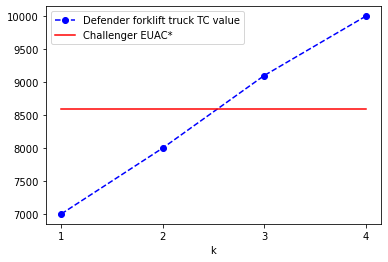

The Defender's TC values are montonically non-decreasing


In [9]:
# Plot the defender's TC values
def_forklift.plot_TC(challenger_euac)
if def_forklift.TC_montotonic():
    print("The Defender's TC values are montonically non-decreasing")
else:
    print("The Defender's TC values are not montonically non-decreasing")

In [10]:
# Determine the optimal replacement time.
life = def_forklift.useful_life()
keep_years = [ t for t in range(0,life) if TC_def[t]<=challenger_euac ]
kstar = len(keep_years)
print(f"Replace the defender with repeatable challenger at EoY {kstar}")

Replace the defender with repeatable challenger at EoY 2


In [11]:
# Determine the optimal EPC and EUAC
EPC_star = npf.npv(marr, [0]+TC_def[:kstar]) \
                   + challenger_euac/(marr*(1+marr)**kstar)
print(f"Optimal EPC under opportunity cost approach = {EPC_star:,.2f}")
EUAC_star_CF = (EPC_star - MV0)*marr
print(f"Optimal EUAC under cash flow approach = {EUAC_star_CF:,.2f}")

Optimal EPC under opportunity cost approach = 84,034.61
Optimal EUAC under cash flow approach = 7,903.46


In [12]:
""" Verify Solutions by minimizing Year-by-Year EPC(k)"""
# Compute the EPC if defender is replaced by repeatable challenger 
# after k years, for k = 0 to N.
print("Verify Solution by Minimizing Year-by-Year EPC")
EPC = [npf.npv(marr, [0]+TC_def[:k]) + challenger_euac/(marr*(1+marr)**k)
       for k in range(0, life+1) ]
pprint_list("EPC", EPC)

Verify Solution by Minimizing Year-by-Year EPC
EPC = 85,981.87   84,528.98   84,034.61   84,411.63   85,369.08   


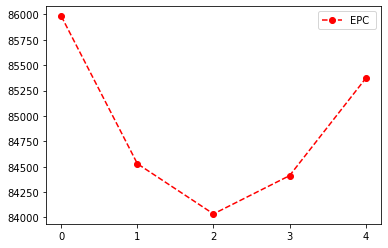

In [13]:
# Plot the replacement plans' EPC values    
fig, ax = plt.subplots()
ax.plot(range(life+1), EPC, 'ro', ls='--' , label='EPC ')
ax.set_xticks(range(life+1))
ax.legend()
plt.show()

In [14]:
# Determine the optimal replacement time.
epc_star = min(EPC)
kstar = EPC.index(epc_star)
print(f"Replace the defender with repeatable challenger at EoY {kstar}")
print(f"Optimal EPC under opportunity cost approach = {epc_star:,.2f}")

euac_star_CF = (epc_star - MV0)*marr
print(f"Optimal EUAC under cash flow approach = {euac_star_CF:,.2f}")

Replace the defender with repeatable challenger at EoY 2
Optimal EPC under opportunity cost approach = 84,034.61
Optimal EUAC under cash flow approach = 7,903.46
